In [1]:
# imports
from matplotlib import pyplot as plt
import compression_handler
import eval_handler
from dataset_handler.kodak import Kodak
from tqdm import tqdm
import numpy as np
from utils import score_image_compression

compression_algorithms = compression_handler.get_all()
eval_algorithms = eval_handler.get_all()
dataset = Kodak()
SAMPLES = 1
SIZE_RANGE = range(31501, 736502, 10000)

In [2]:
data = np.zeros((len(eval_algorithms), len(compression_algorithms), len(SIZE_RANGE), SAMPLES))
samples = dataset.get_samples(SAMPLES).itertuples()
for r_indx, row in tqdm(enumerate(samples)):
    raw_image = dataset.get_PIL_image(row)
    for c_indx, compression_algorithm in enumerate(compression_algorithms):
        comp_alg = compression_algorithm
        for e_indx, evaluation_algorithm in enumerate(eval_algorithms):
            eval_alg = evaluation_algorithm
            for s_indx, size in enumerate(SIZE_RANGE):
                data[e_indx, c_indx, s_indx, r_indx] = score_image_compression(raw_image, size, comp_alg, eval_alg)
        


1it [00:12, 12.40s/it]


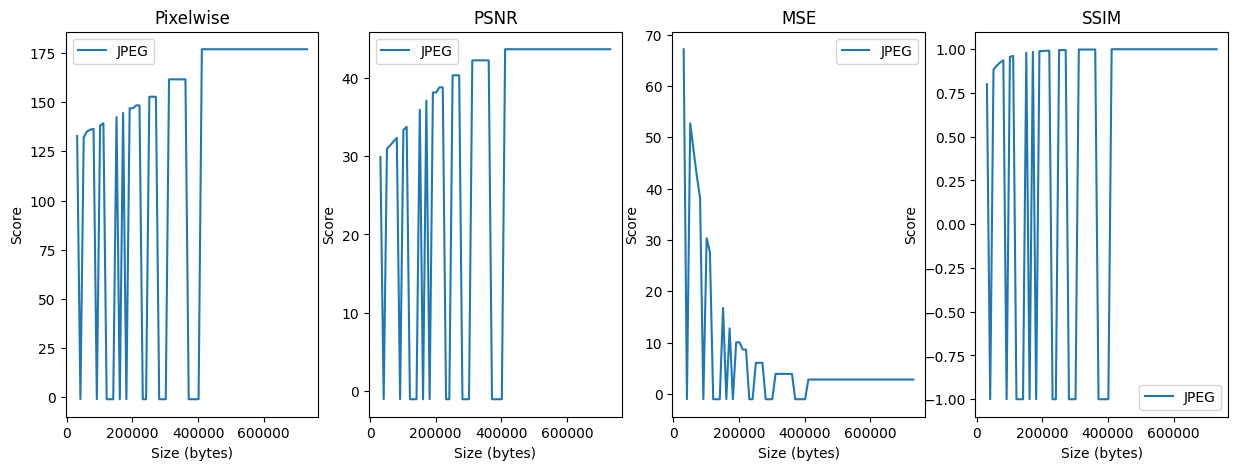

In [3]:
plot, ax = plt.subplots(1, len(eval_algorithms), figsize=(15, 5))
if ax.size == 1:
    ax = [ax]
# average the samples
data = np.mean(data, axis=-1)
# plot the data
for i, eval_algorithm in enumerate(eval_algorithms):
    ax[i].set_title(eval_algorithm.__class__.__name__)
    for j, compression_algorithm in enumerate(compression_algorithms):
        ax[i].plot(SIZE_RANGE, data[i, j], label=compression_algorithm.__class__.__name__)
        ax[i].set_xlabel('Size (bytes)')
        ax[i].set_ylabel('Score')
        ax[i].legend()